In [166]:
#Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#File to Load (Remember to Change These)
mouse_drug_data_load = "data/mouse_drug_data.csv"
clinical_trial_data_load = "data/clinicaltrial_data.csv"

#Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug=pd.read_csv(mouse_drug_data_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_load)

#Combine the data into a single dataset
complete_clinical_data=pd.merge(mouse_drug, clinical_trial_data, how="left", on=["Mouse ID"])

#Display the data table for preview
complete_clinical_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [167]:
#Make a copy of the original complete data set for manipulation
complete_clinical_copy=complete_clinical_data.copy()

#Use 'Drug','Timepoint', and 'Tumor Volume (mm3)' columns for analysis
tumor_data_df= complete_clinical_copy[['Drug', 'Timepoint','Tumor Volume (mm3)']]

#Preview DataFrame
#tumor_data_df

#Use Groupby Function (Drug and Timepoint) to find mean of Tumor Volume(mm3) + convert to DataFrame
tumor_vol_mean=pd.DataFrame(tumor_data_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

#Preview DataFrame
#tumor_vol_mean

#Clean data by using the Pivot Table function [Index = timepoint, column = Drug, values = Tumor Volume (mm3)]
tumor_vol_mean_clean=tumor_vol_mean.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

#Preview DataFrame
tumor_vol_mean_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [168]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_data_df["Standard Error of Tumor Volume"] = tumor_data_df['Tumor Volume (mm3)'].sem()
tumor_data_df.reset_index(inplace = True)

#Preview DataFrame
tumor_data_df.head()


,index,Drug,Timepoint,Tumor Volume (mm3),Standard Error of Tumor Volume
0,0,Stelasyn,0,45.000000,0.203161
1,1,Stelasyn,5,47.313491,0.203161
2,2,Stelasyn,10,47.904324,0.203161
3,3,Stelasyn,15,48.735197,0.203161
4,4,Stelasyn,20,51.112713,0.203161


In [169]:
#Create a pivot table with the Standard Error of Total Volume with Timepoint and Drug Name then print for preview
tumor_error_pivot = tumor_data_df.pivot_table(index='Timepoint',columns='Drug',values='Standard Error of Tumor Volume')  
tumor_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161
5,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161
10,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161
15,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161
20,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161,0.203161


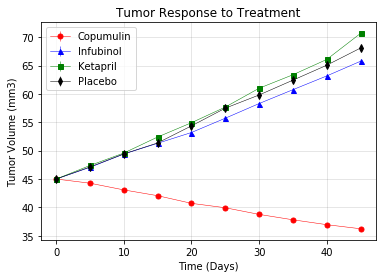

In [234]:
#Generate the Plot (with Error Bars)
plt.errorbar(tumor_vol_mean_clean.index, tumor_vol_mean_clean["Capomulin"], yerr=tumor_error_pivot["Capomulin"],
             color='red', marker='o', markersize=5, linestyle='-', linewidth=0.5,label="Copumulin")

plt.errorbar(tumor_vol_mean_clean.index, tumor_vol_mean_clean["Infubinol"], yerr=tumor_error_pivot["Infubinol"],
             color='blue', marker='^', markersize=5, linestyle='-', linewidth=0.5, label="Infubinol")

plt.errorbar(tumor_vol_mean_clean.index, tumor_vol_mean_clean["Ketapril"], yerr=tumor_error_pivot["Ketapril"],
             color='green', marker='s', markersize=5, linestyle='-', linewidth=0.5, label="Ketapril")

plt.errorbar(tumor_vol_mean_clean.index, tumor_vol_mean_clean["Placebo"], yerr=tumor_error_pivot["Placebo"],
             color='black', marker='d', markersize=5, linestyle='-', linewidth=0.5, label= "Placebo")

x_lim = len(tumor_vol_mean_clean.index)
#Add the Chart Title - "Tumor Response to Treatment"
plt.title("Tumor Response to Treatment")
#Add the x-label - "Time (Days)"
plt.xlabel("Time (Days)")
# Add the y-label - "Tumor Volume (mm3)"
plt.ylabel("Tumor Volume (mm3)")
#Add the legend to best location (upper left)
plt.legend(loc="best")
#Add grid lines to plot
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
#Save Graph
plt.savefig("../Images/TumorResponse.png")
#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [172]:
#Make a copy of the original complete data set for manipulation
complete_clinical_copy2=complete_clinical_data.copy()

#Use 'Drug','Timepoint', and 'Metastatic Sites' columns for analysis
meta_data_df= complete_clinical_copy[['Drug', 'Timepoint','Metastatic Sites']]

#Preview DataFrame
#meta_data_df

#Use Groupby Function (Drug and Timepoint) to find mean Metastastic Sites + convert to DataFrame
meta_site_mean=pd.DataFrame(meta_data_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

#Preview DataFrame
#meta_site_mean

#Clean data by using the Pivot Table function [Index = timepoint, column = Drug, values = Metastatic Sites]
meta_site_mean_clean=meta_site_mean.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

#Preview DataFrame
meta_site_mean_clean


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [173]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
meta_data_df["Standard Error of Metastatic Sites"] = meta_data_df['Metastatic Sites'].sem()
meta_data_df.reset_index(inplace = True)

#Preview DataFrame
meta_data_df.head()


,index,Drug,Timepoint,Metastatic Sites,Standard Error of Metastatic Sites
0,0,Stelasyn,0,0,0.02602
1,1,Stelasyn,5,0,0.02602
2,2,Stelasyn,10,0,0.02602
3,3,Stelasyn,15,1,0.02602
4,4,Stelasyn,20,2,0.02602


In [174]:
#Create a pivot table with the Standard Error of Metastatic Sites with Timepoint and Drug Name then print for preview
meta_error_pivot = meta_data_df.pivot_table(index='Timepoint',columns='Drug',values='Standard Error of Metastatic Sites')  
meta_error_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602
5,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602
10,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602
15,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602
20,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602,0.02602


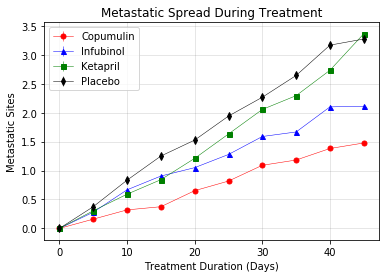

In [233]:
#Generate the Plot (with Error Bars)
plt.errorbar(meta_site_mean_clean.index, meta_site_mean_clean["Capomulin"], yerr=meta_error_pivot["Capomulin"],
             color='red', marker='o', markersize=5, linestyle='-', linewidth=0.5,label="Copumulin")

plt.errorbar(meta_site_mean_clean.index, meta_site_mean_clean["Infubinol"], yerr=meta_error_pivot["Infubinol"],
             color='blue', marker='^', markersize=5, linestyle='-', linewidth=0.5, label="Infubinol")

plt.errorbar(meta_site_mean_clean.index, meta_site_mean_clean["Ketapril"], yerr=meta_error_pivot["Ketapril"],
             color='green', marker='s', markersize=5, linestyle='-', linewidth=0.5, label="Ketapril")

plt.errorbar(meta_site_mean_clean.index, meta_site_mean_clean["Placebo"], yerr=meta_error_pivot["Placebo"],
             color='black', marker='d', markersize=5, linestyle='-', linewidth=0.5, label= "Placebo")

x_lim = len(meta_site_mean_clean.index)
#Add the Chart Title - "Metastatic Spread During Treatment"
plt.title("Metastatic Spread During Treatment")
#Add the x-label - "Treatment Duration (Days)"
plt.xlabel("Treatment Duration (Days)")
# Add the y-label - "Metastatic Sites"
plt.ylabel("Metastatic Sites")
#Add the legend to best location (upper left)
plt.legend(loc="best")
#Add grid lines to plot
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
#Save Graph
plt.savefig("../Images/MetastaticSpread.png")
#Show the Figure
plt.show()

## Survival Rates

In [177]:
#Make a copy of the original complete data set for manipulation
complete_clinical_copy3=complete_clinical_data.copy()

#Use 'Drug','Timepoint', and 'Mouse ID' columns for analysis
mouse_survival_df= complete_clinical_copy3[['Drug', 'Timepoint','Mouse ID']]

#Preview DataFrame
mouse_survival_df.head()



,Drug,Timepoint,Mouse ID
0,Stelasyn,0,f234
1,Stelasyn,5,f234
2,Stelasyn,10,f234
3,Stelasyn,15,f234
4,Stelasyn,20,f234


In [178]:
#Use Groupby Function (Drug and Timepoint) to find count of Mouse IDs + convert to DataFrame
mouse_survival_count=pd.DataFrame(mouse_survival_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())

#Preview DataFrame
#mouse_survival_count

#Clean data by using the Pivot Table function [Index = timepoint, column = Drug, values = Metastatic Sites]
mouse_survival_count_clean=mouse_survival_count.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')

#Preview DataFrame
mouse_survival_count_clean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


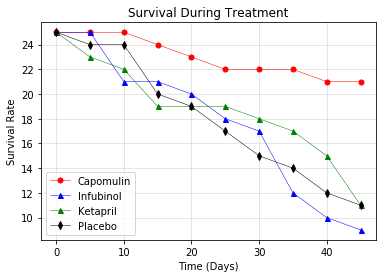

In [232]:
#Generate the Plot
plt.errorbar(mouse_survival_count_clean.index, mouse_survival_count_clean["Capomulin"],
             color='red',marker='o',markersize=5,linestyle='-',linewidth=0.5,label="Capomulin")
plt.errorbar(mouse_survival_count_clean.index, mouse_survival_count_clean["Infubinol"],
            color='blue',marker='^',markersize=5,linestyle='-',linewidth=0.5,label="Infubinol")
plt.errorbar(mouse_survival_count_clean.index, mouse_survival_count_clean["Ketapril"],
            color='green',marker='^',markersize=5,linestyle='-',linewidth=0.5,label="Ketapril")
plt.errorbar(mouse_survival_count_clean.index, mouse_survival_count_clean["Placebo"],
            color='black',marker='d',markersize=5,linestyle='-',linewidth=0.5, label="Placebo")
#Add the Chart Title - "Survival During Treatment"
plt.title("Survival During Treatment")
#Add the x-label - "Time (Days)"
plt.xlabel("Time (Days)")
#Add the y-label - "Survival Rate"
plt.ylabel("Survival Rate")
#Add the legend to the best location (bottom left)
plt.legend(loc="best")
#Add grid lines to plot
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
#Save Graph
plt.savefig("../Images/SurvialRates.png")
#Show the Figure
plt.show()

## Summary Bar Graph

In [195]:
#To calculate the total change in Tumor Volume, subtract the final tumor volume from the initial tumor volume then divide by the initial tumor volume
#We want a percentage so we multiply that value by 100
#Print to confirm
tumor_change_percentage=((tumor_vol_mean_clean.iloc[-1]-tumor_vol_mean_clean.iloc[0])/tumor_vol_mean_clean.iloc[0]) * 100
tumor_change_percentage


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [200]:
drug=['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
change=[-19.475303,42.516492,46.123472,57.028795,53.923347,51.297960,47.241175,-22.320900,52.085134,46.579751]
#Function to determine number of items in the array
x_axis=np.arange(len(change))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

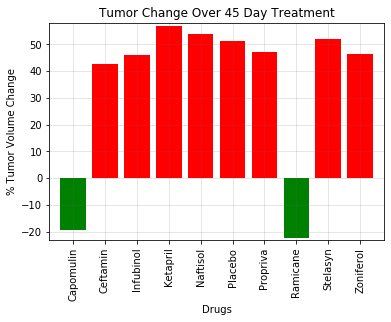

In [230]:
#Plot bar graph with green values showing decrease in % Tumor Volume Change
#Red values indicate increase in % Tumor Volume Change
#Align in center
plt.bar(drug,change,color=['green','red','red','red','red','red','red','green','red','red'],align="center")
#x-labels vertical for cleaner formatting
plt.xticks(drug, rotation='vertical')
#Add Title: "Tumor Change Over 45 Day Treatment"
plt.title("Tumor Change Over 45 Day Treatment")
#Add label to x-axis: "Drugs"
plt.xlabel("Drugs")
#Add label to y-axis: "% Tumor Volume Change"
plt.ylabel("% Tumor Volume Change")
#Add grid lines to plot
plt.grid(b=True, which='major', color='#666666', linestyle='-', alpha=0.2)
#Set the limits of the x-axis
plt.xlim(-0.75, len(x_axis)-0.25)
#Set the limits of the y-axis
plt.ylim(min(change)-1, max(change)+1)
#Save Bar Graph
plt.savefig("../Images/TumorChangeBar.png")
#Show Bar Graph
plt.show()

In [ ]:
#Observations:
#1. Capomulin and Ramicane significantly lowered the growth and spread of tumors in the mouse subjects
#2. Stelasyn, Naftisol, Infubinol, and Ketapril were not good treatments for tumors in mice, as they performed equal or worse than the placebo group
#3. Infubinol showed the worst survival rate among tumurous mice, with a steep drop off after 30 days